# Oppgave a)

In [1]:
cd ..

/Users/halvortyseng/Desktop/FYS-STK3155-project-2


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import functions from src folder
import src.regression_tools as rt
import src.regression_cost_funcs as rcf
import src.gradient_descent as gd
import src.data_generation as dg
from sklearn.model_selection import train_test_split

In [9]:
#generate data
N = 500 #nr of data points
x, y, z, true_z = dg.generate_data_Franke(N=N, sigma2=0.01, seed=1)

poly_grad = 5
X = rt.create_X_polynomial(x, y, poly_grad)
z = z.reshape(-1, 1)

# Split data:
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=0.25)

## Analysis MSE developmens over epochs for different learning-rate 

In [10]:
# We want to models of gradient decent, high and low learning-rate
lr1 = 0.01
lr2 = 0.1

#choose cost function model to investigate:
model = rcf.OLSCost()

descent1 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)
descent2 = gd.GradientDescent(mode="normal", momentum_param=0, batch_size=None, store_extra=True)

#choose initial weigths and number of epochs
w_init = np.zeros(len(X[0]))
epochs = 200

#train on the train data and return final weights
w1 = descent1.train(X_train, w_init, z_train, model, learning_rate=lr1, n_epochs = epochs)
w2 = descent2.train(X_train, w_init, z_train, model, learning_rate=lr2, n_epochs = epochs)

#extract weights as a function of epocs
wlog1 = descent1.weights 
wlog2 = descent1.weights 

In [11]:
# Maby make it as a function:

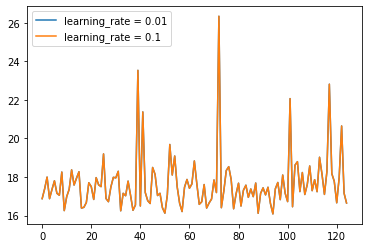

In [14]:
# y_pred as an array corrosponding to predictiv y for each epoch 
z_pred_arr = X_test@wlog1.T
epoc_arr = np.zeros(len(z_pred_arr))
MSE_arr = np.zeros(len(z_pred_arr))
for i in range(len(epoc_arr)):
    epoc_arr[i] = i
    MSE_arr[i] = rt.MSE(z_pred_arr[i], z_test)

plt.plot(epoc_arr, MSE_arr, label=f"learning_rate = {lr1}")

z_pred_arr = X_test@wlog2.T
epoc_arr = np.zeros(len(z_pred_arr))
MSE_arr = np.zeros(len(z_pred_arr))
for i in range(len(epoc_arr)):
    epoc_arr[i] = i
    MSE_arr[i] = rt.MSE(z_pred_arr[i], z_test)

plt.plot(epoc_arr, MSE_arr, label=f"learning_rate = {lr2}")
plt.legend()
plt.show()

## Analysis MSE over learning rate - Fixed n_epochs

In [ ]:

def lr_iter(X, z, lr_range):
    """ """
    
    
    return MSE_array


# create linspace learning-rate
learning_rate_range = np.linspace(0.01, 0.1, 10)